In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import FactorAnalysis
import pylab

import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits import mplot3d
from sklearn import datasets

from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding


# Part I

### Exploring Boston Dataset

Source: http://lib.stat.cmu.edu/datasets/boston

In [2]:
boston_df = pd.read_csv('datasets/boston.csv')

boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
FEATURES = list(boston_df.columns[:-1])

FEATURES

['crime rate',
 'residential land zone',
 'business acres',
 'Charles River',
 'nitric oxides',
 'number of rooms',
 'age',
 'distances to employment centres',
 'accessibility to highways',
 'property-tax',
 'pupil-teacher ratio',
 'lower income levels']

### Applying Principle Component Analysis for Feature Selection

Sources: https://en.wikipedia.org/wiki/Principal_component_analysis, https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html

In [4]:
def apply_pca(X, n, add_constant = False):
    
    pca = PCA(n_components = n)  
    x_new = pca.fit_transform(X)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)    
        
    return pca, pd.DataFrame(x_new)

In [5]:
pca, _ = apply_pca(boston_df[FEATURES], len(FEATURES))

In [6]:
print("Explained Variance:", pca.explained_variance_ratio_)
print("Summation of the Variances: " + str(sum(pca.explained_variance_ratio_)))

Explained Variance: [9.60040728e-01 2.73884414e-02 8.89341069e-03 1.72579506e-03
 9.36295702e-04 5.35816960e-04 3.19581712e-04 1.09868221e-04
 3.93666446e-05 8.58505778e-06 2.00834312e-06 1.02396314e-07]
Summation of the Variances: 1.0


Text(0, 0.5, 'cumulative variance')

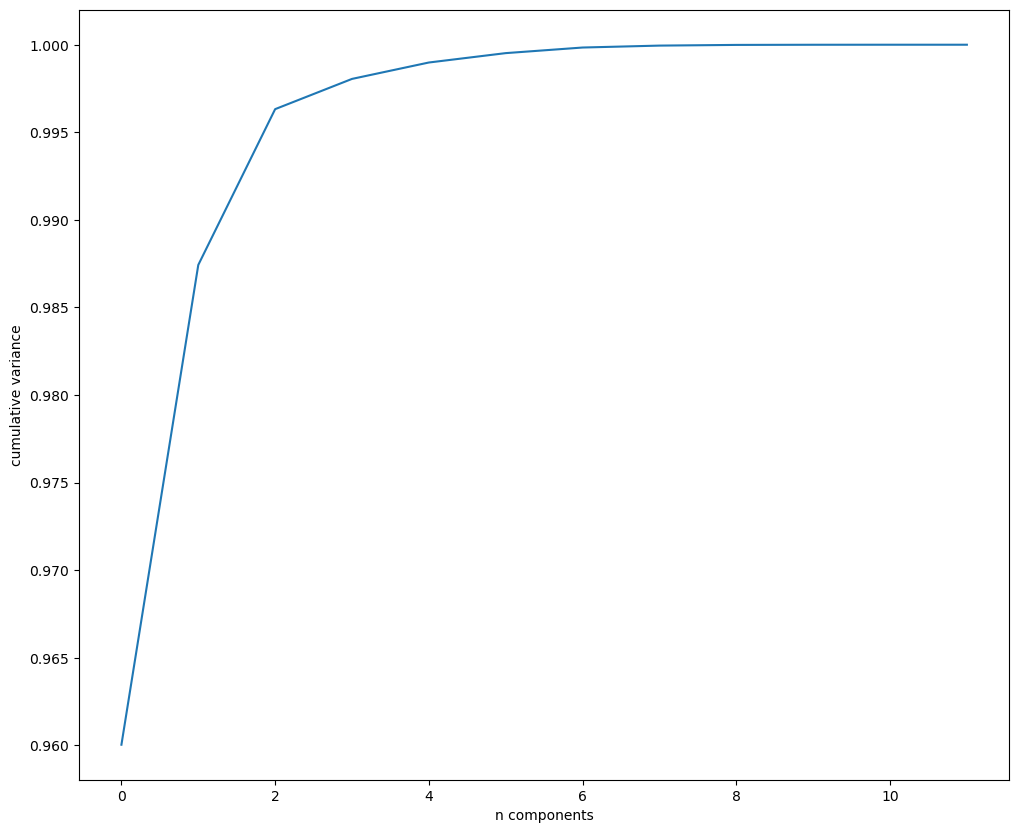

In [7]:
plt.figure(figsize = (12,10))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance')

### Helper function for testing Linear Regression and Ordinary Least Squares

In [8]:
def build_model(regression_fn, target, features, dataset, *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]

    _ , X_new = apply_pca(X, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
  
    
    return { 'x_initial' : X, 'x_transform': X_new, 'x_train': x_train, 'x_test': x_test, 'y_train': y_train, 'y_test': y_test, 'y_pred': y_pred, 'model': model }     

In [9]:
def ols_reg(x_train, y_train):
    ols = sm.OLS(y_train, x_train)
    model = ols.fit()
    return model

def linear_reg(x_train, y_train):
    model = LinearRegression().fit(x_train, y_train)
    return model

In [10]:
model_params = {}

### For OLS Regression

In [11]:
model_params['statsmodel_reg'] = build_model(ols_reg, 'Median Home Value', FEATURES, boston_df, 7, True)

In [12]:
model       = model_params['statsmodel_reg']['model']
x_initial   = model_params['statsmodel_reg']['x_initial']
x_transform = model_params['statsmodel_reg']['x_transform']
x_train     = model_params['statsmodel_reg']['x_train']
x_test      = model_params['statsmodel_reg']['x_test']
y_train     = model_params['statsmodel_reg']['y_train']
y_test      = model_params['statsmodel_reg']['y_test']
y_pred      = model_params['statsmodel_reg']['y_pred']

Text(0, 0.5, 'Principal Component 2')

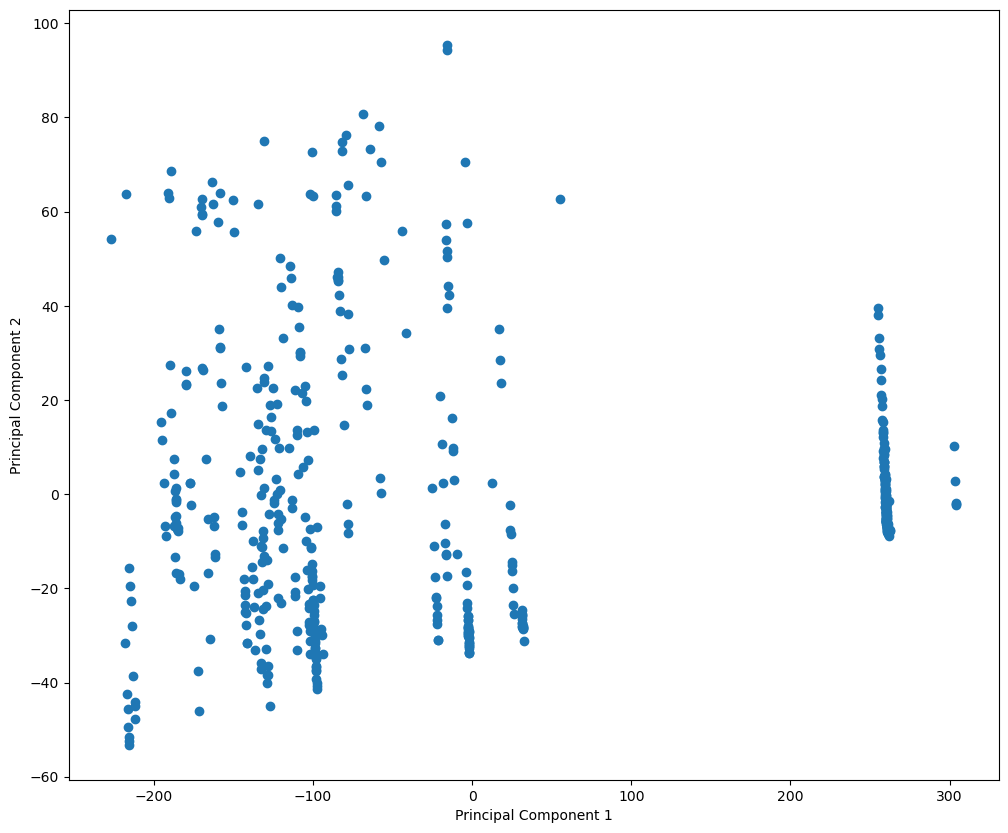

In [13]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(x_transform[1], x_transform[2], cmap = 'Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [14]:
print('Rsquared: ', model.rsquared)
print('Adjusted Rsquared: ', model.rsquared_adj)

Rsquared:  0.6167900924553524
Adjusted Rsquared:  0.6100161799482501


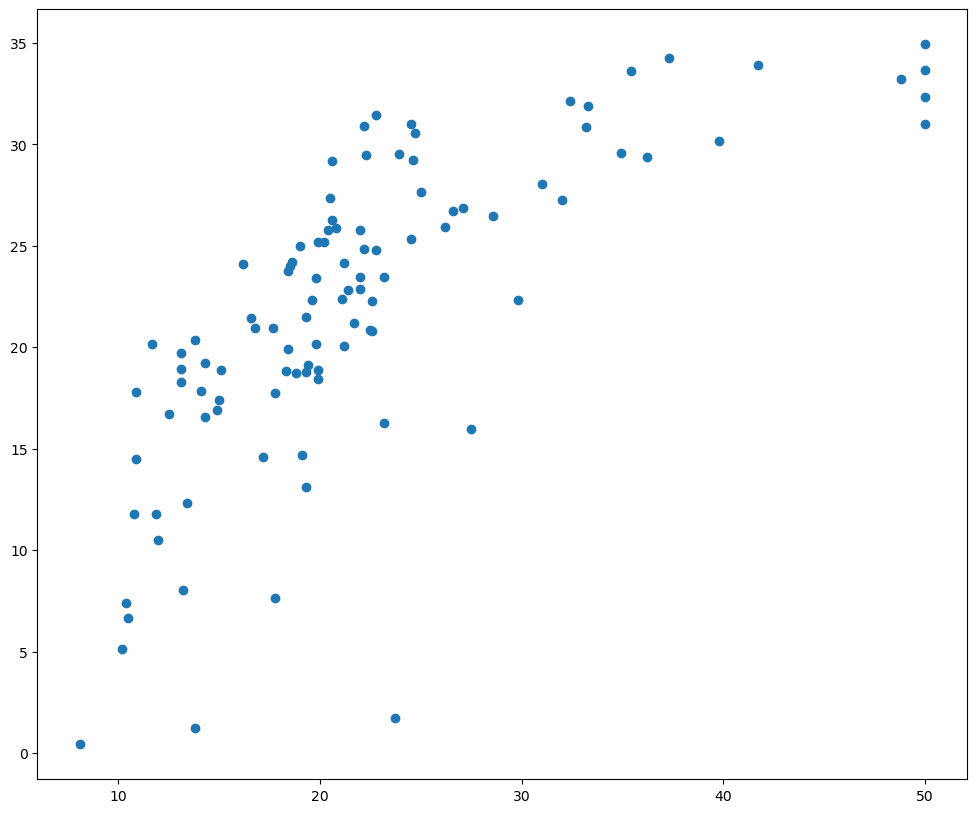

In [15]:
plt.figure(figsize = (12,10))
plt.scatter(y_test.values, y_pred)
plt.show()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Median Home Value   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     91.05
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.69e-78
Time:                        15:46:10   Log-Likelihood:                -1275.0
No. Observations:                 404   AIC:                             2566.
Df Residuals:                     396   BIC:                             2598.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             22.4889      0.286     78.652      0.000      21.927      23.051
1             -0.0255      0.002    -14.953      0.000      -0.029      -0.022
2              0.0706      0.010      7.094      0.000       0.051       0.090
3              0.0438      0.018      2.475      0.014       0.009       0.079
4             -0.2845      0.038     -7.575      0.000      -0.358      -0.211
5             -0.9145      0.054    -16.784      0.000      -1.022      -0.807
6              0.2634      0.069      3.830      0.000       0.128       0.399
7             -0.3376      0.093     -3.613      0.000      -0.521      -0.154
==============================================================================
Omnibus:                      107.169   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.732
Skew:                           1.366   Prob(JB):                     6.48e-52
Kurtosis:                       5.557   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### For Linear Regression

In [17]:
model_params['sklearn_reg'] = build_model(linear_reg, 'Median Home Value', FEATURES, boston_df, 6)

In [18]:
model       = model_params['sklearn_reg']['model']
x_transform = model_params['sklearn_reg']['x_transform']
x_train     = model_params['sklearn_reg']['x_train']
x_test      = model_params['sklearn_reg']['x_test']
y_train     = model_params['sklearn_reg']['y_train']
y_test      = model_params['sklearn_reg']['y_test']
y_pred      = model_params['sklearn_reg']['y_pred']

Text(0, 0.5, 'Principal Component 2')

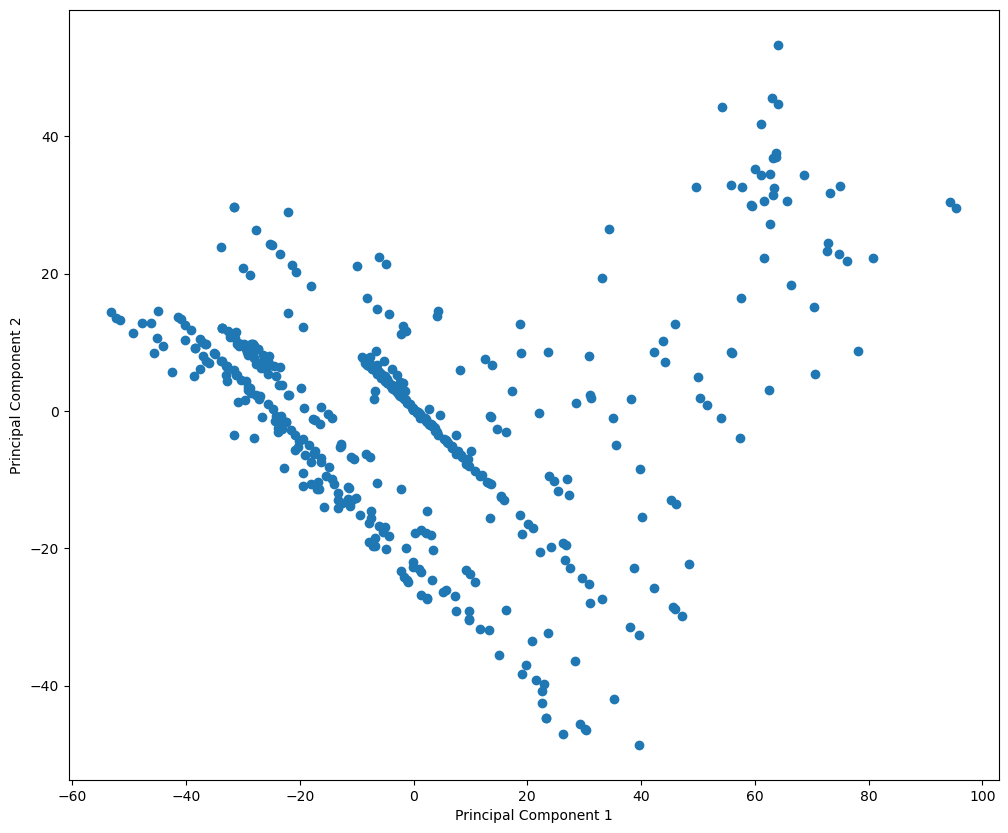

In [19]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(x_transform[1], x_transform[2], cmap = 'Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [20]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.5989634958208904
Testing score:  0.5242480470334494


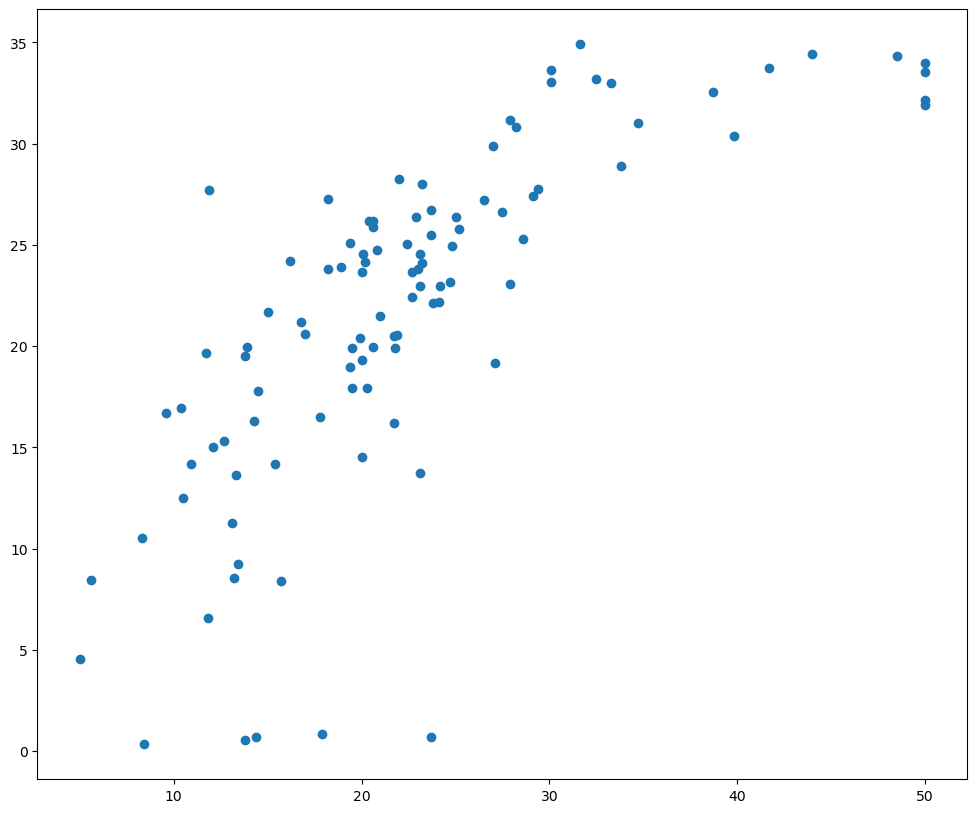

In [21]:
plt.figure(figsize = (12,10))

plt.scatter(y_test.values, y_pred)

plt.show()

# Part II

### Exploring the Iris Dataset and doing Linear Discriminant Analysis

Source: https://en.wikipedia.org/wiki/Linear_discriminant_analysis, https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [22]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [24]:
X.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
19,5.1,3.8,1.5,0.3
134,6.1,2.6,5.6,1.4
131,7.9,3.8,6.4,2.0
144,6.7,3.3,5.7,2.5
78,6.0,2.9,4.5,1.5
109,7.2,3.6,6.1,2.5
67,5.8,2.7,4.1,1.0
148,6.2,3.4,5.4,2.3
58,6.6,2.9,4.6,1.3
125,7.2,3.2,6.0,1.8


In [25]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
iris_corr = X.corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot: >

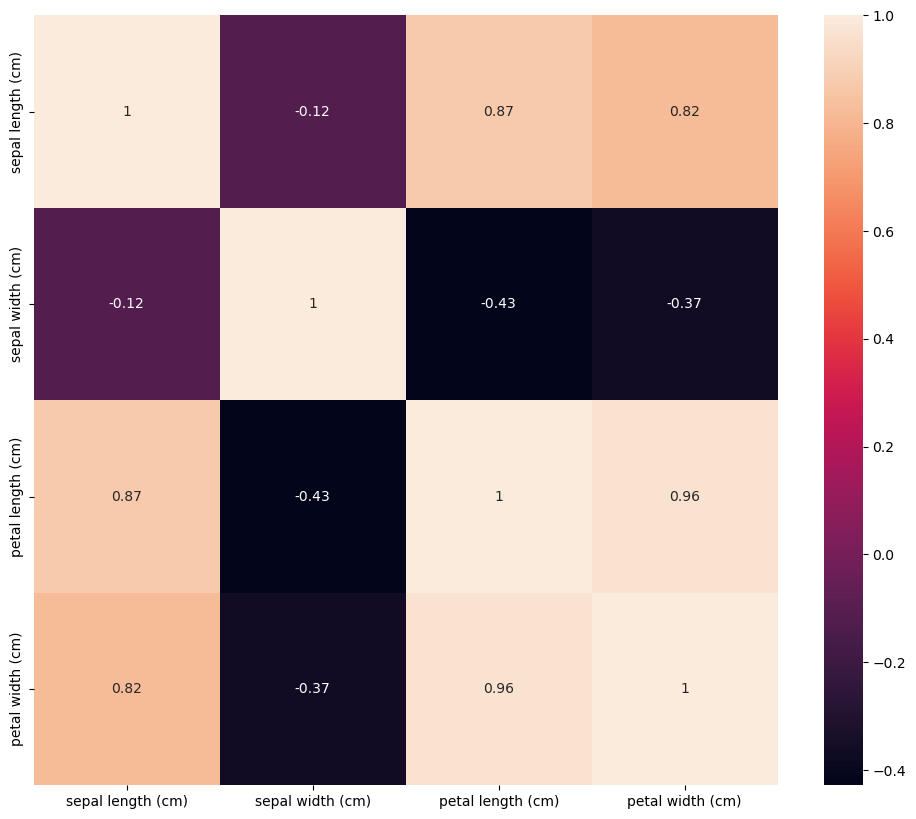

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(iris_corr, annot = True)

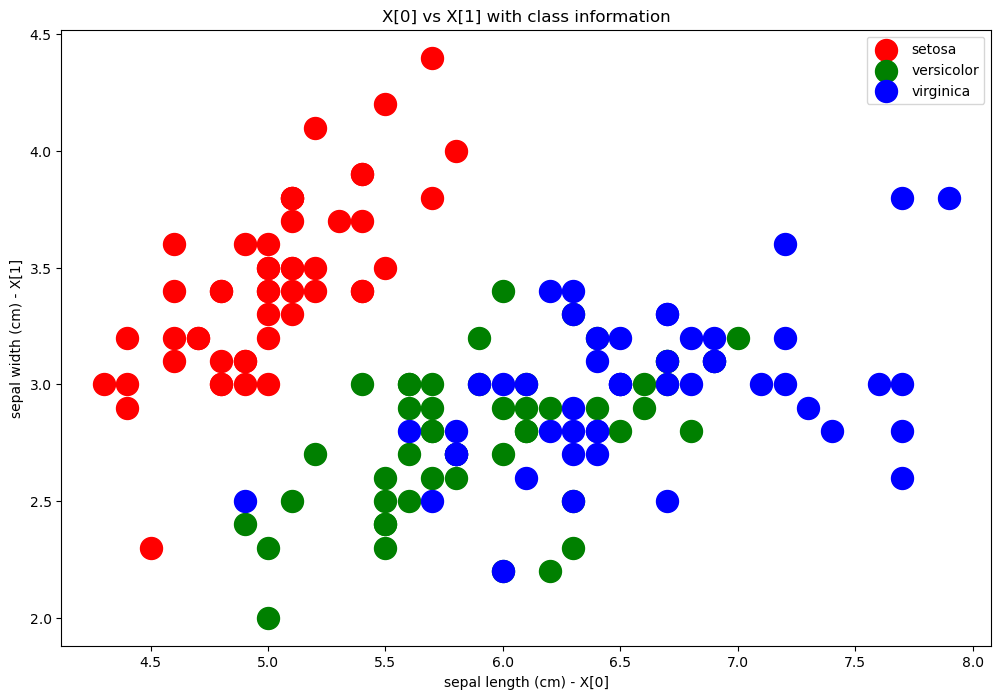

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.array(X)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], c = c, s=250, label = target_name)

plt.title('X[0] vs X[1] with class information')
plt.xlabel('sepal length (cm) - X[0]')
plt.ylabel('sepal width (cm) - X[1]')

plt.legend()
plt.show()

### Performing a tranform on the data using Linear Discriminant Analysis

In [30]:
lda = LDA(n_components = 2)
X_new = lda.fit_transform(X, y)
lda.explained_variance_ratio_
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1
0,8.061800,-0.300421
1,7.128688,0.786660
2,7.489828,0.265384
3,6.813201,0.670631
4,8.132309,-0.514463


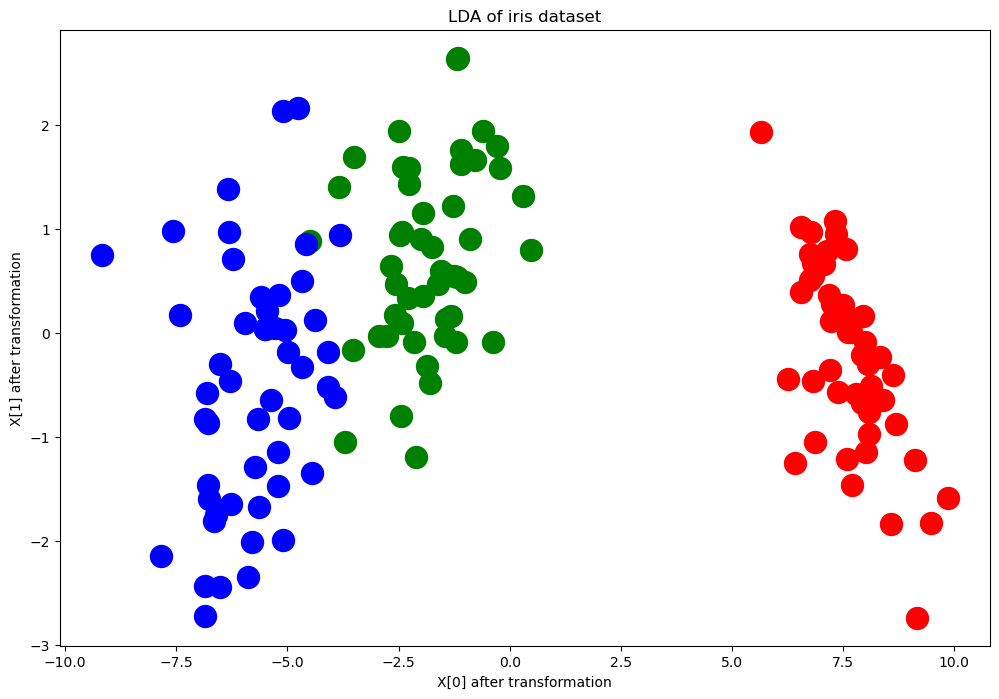

In [31]:
fig, ax = plt.subplots(figsize = (12, 8))

x_new = np.array(X_new)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter( x_new[y == i, 0], x_new[y == i, 1], c = c, s=250, label = target_name)
    

plt.title('LDA of iris dataset')
plt.xlabel('X[0] after transformation')
plt.ylabel('X[1] after transformation');
plt.show()

In [32]:
lda_corr = X_new.corr()
lda_corr

,0,1
0,1.000000e+00,5.160785e-16
1,5.160785e-16,1.000000e+00


### Comparing Results with and without LDA

In [33]:
model = LogisticRegression(solver = 'liblinear', multi_class='auto')
model.fit(X, y)
model.score(x, y)

0.96

In [34]:
model = LogisticRegression(solver = 'liblinear', multi_class='auto')
model.fit(X_new, y)
model.score(X_new, y)

0.9333333333333333

### Exploring the Cancer Dataset and doing Factor Analysis

Source: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html, https://en.wikipedia.org/wiki/Factor_analysis

In [35]:
cancer_df = pd.read_csv('datasets/cancer.csv')
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Text(0, 0.5, 'mean texture - X[1]')

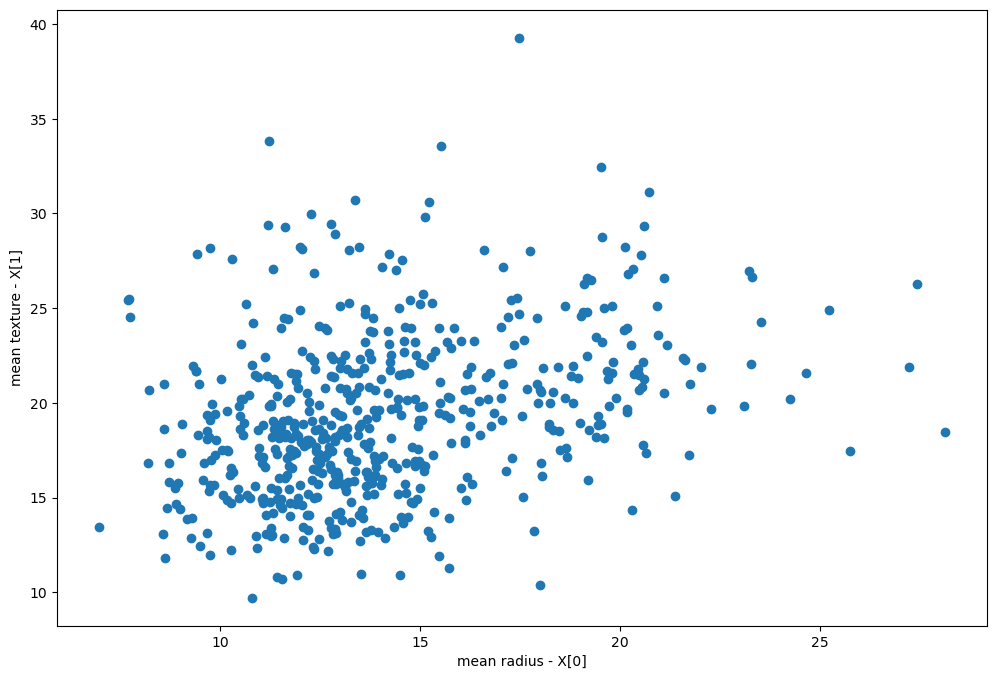

In [36]:
figure = plt.figure(figsize = (12, 8))

plt.scatter(cancer_df.iloc[:,0], cancer_df.iloc[:,1], cmap = 'Spectral')

plt.xlabel('mean radius - X[0]')
plt.ylabel('mean texture - X[1]')

In [37]:
FEATURES = list(cancer_df.columns[:-1])

FEATURES

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

### Helper function to build models and do factor analysis

In [38]:
import pylab

def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
       
        print()

def visualize_results(result_dict):
    
    n_components = list(range(0, 30))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')

    pylab.ylim([0.7, 1.2])

    plt.xlabel('n components')
    plt.ylabel('score')
    
    plt.legend()

def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver = 'liblinear', max_iter=10000)
    model.fit(x_train, y_train)
    return model

from sklearn.decomposition import FactorAnalysis

def do_factor_analysis(x, y, n):
    fact_a = FactorAnalysis(n_components = n, random_state = 10, max_iter=10000)
    x_new = fact_a.fit_transform(x, y) 
    return fact_a, pd.DataFrame(x_new)

In [39]:
def build_model(y_col_names, x_col_names, dataset, *hyperparameters):
    
    X = dataset[x_col_names]
    Y = dataset[y_col_names]

    fa_obj, X = do_factor_analysis(X, Y, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = logistic_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                 'y_pred' : y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
  
    return {'fact_a_obj' : fa_obj, 'transform_x' : X, 'accuracy': acc, 'precision' : prec, 'recall' : recall, 'confusion_matrix' : model_crosstab }  

In [40]:
result_dict = {}
    
for i in range (1, 31):
    result_dict['n_components - ' + str(i)] = build_model('class', FEATURES, cancer_df, i)

In [41]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score :  0.9385964912280702
precision_score :  0.9342105263157895
recall_score :  0.9726027397260274

Test:  n_components - 2

accuracy_score :  0.8947368421052632
precision_score :  0.8378378378378378
recall_score :  1.0

Test:  n_components - 3

accuracy_score :  0.8947368421052632
precision_score :  0.8533333333333334
recall_score :  0.9846153846153847

Test:  n_components - 4

accuracy_score :  0.9385964912280702
precision_score :  0.9594594594594594
recall_score :  0.9466666666666667

Test:  n_components - 5

accuracy_score :  0.9210526315789473
precision_score :  0.9066666666666666
recall_score :  0.9714285714285714

Test:  n_components - 6

accuracy_score :  0.9649122807017544
precision_score :  0.9722222222222222
recall_score :  0.9722222222222222

Test:  n_components - 7

accuracy_score :  0.9736842105263158
precision_score :  0.958904109589041
recall_score :  1.0

Test:  n_components - 8

accuracy_score :  0.9473684210526315
precision_score :

### Results from Factor Analysis

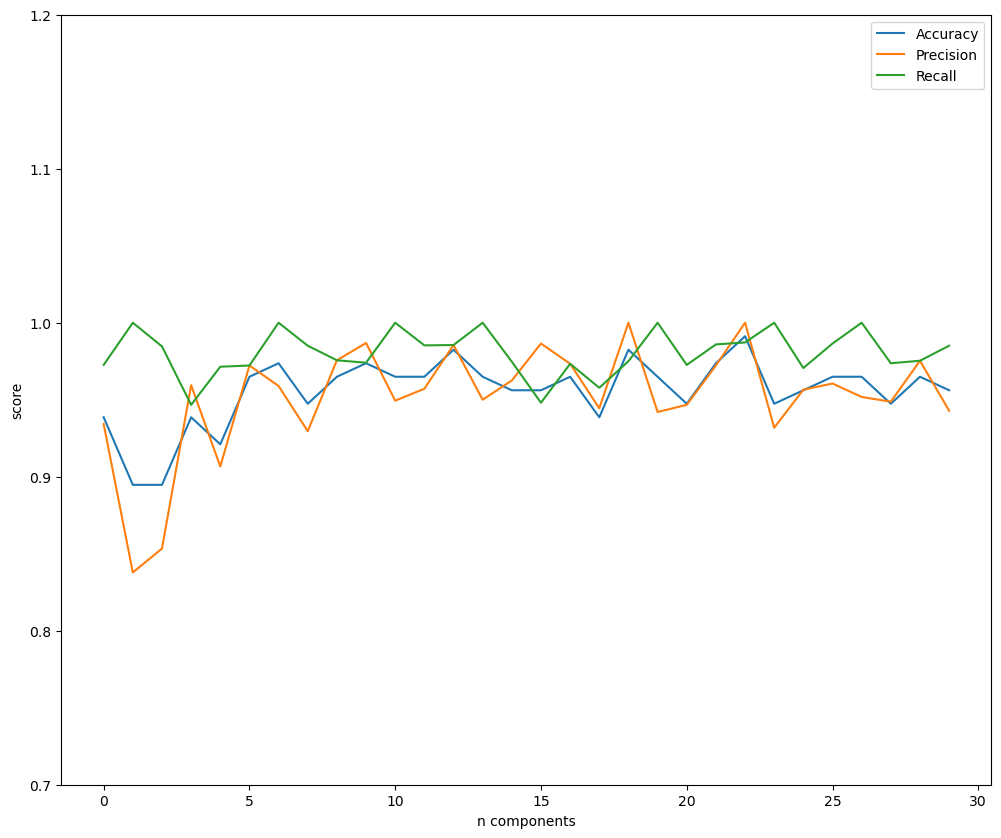

In [42]:
visualize_results(result_dict)

# Part III

### Dimension Reduction on Non-Linear Data using Manifold Learning

Source: https://scikit-learn.org/stable/modules/manifold.html, https://towardsdatascience.com/manifold-learning-the-theory-behind-it-c34299748fec, https://towardsdatascience.com/manifold-learning-t-sne-lle-isomap-made-easy-42cfd61f5183

### Playing with an S-curve

In [43]:
def generate_s_curve(method, n = 1500):
    
    X, color = method( n_samples = n)
    
    print ("Shape of X : ", X.shape)
    print ("Shape of color : ", color.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(12, 8))
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.RdYlBu, s=100);
    
    return X, color

Shape of X :  (1500, 3)
Shape of color :  (1500,)

Sample X : 

             0         1         2
454   0.915795  0.614391 -1.401646
1381  0.714763  1.743585  1.699367
319   0.300046  1.512593  1.953925
25   -0.658369  0.257957 -1.752695
599   0.706023  1.093923 -1.708188
349  -0.303131  1.779000  0.047051
132  -0.670238  1.890237  0.257854
243  -0.281440  1.272232  0.040421
49   -0.903497  0.562968  0.571406
919   0.238277  1.200525 -1.971197


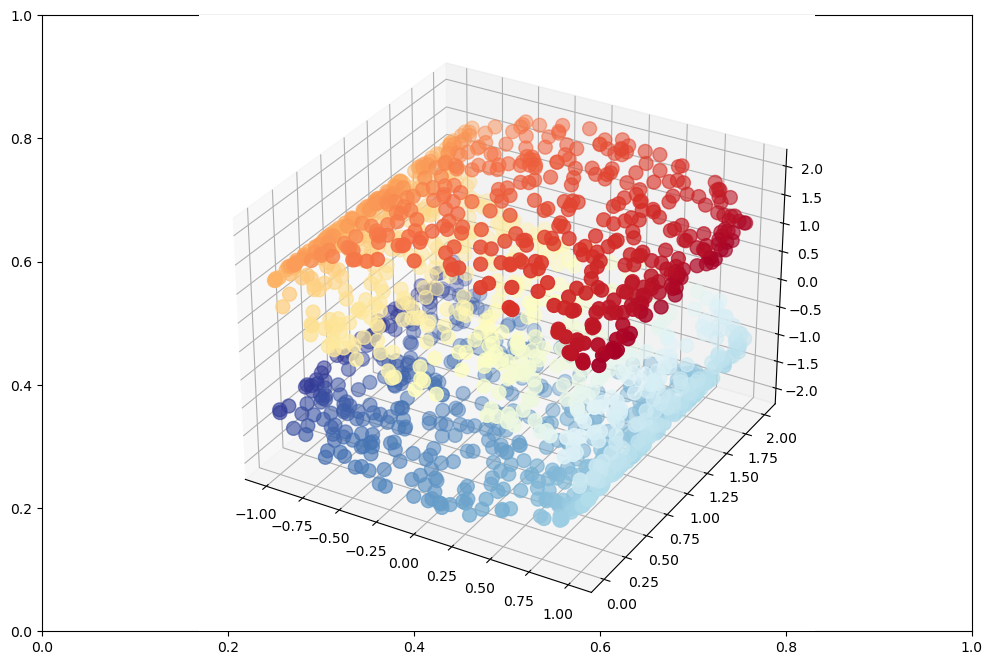

In [44]:
X, color = generate_s_curve(datasets.make_s_curve)

### Helper function for manifold  learning

In [45]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize = (12, 10))
    plt.axis('equal')
    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]')
    
    return method

### Visiualizing and Comparing different Manifold Learning Methods

New shape of X :  (1500, 2)

Sample X : 

             0         1
1417 -0.450156 -0.200911
86   -0.114615  0.391686
581  -0.445816 -0.016459
936  -0.508348  0.209300
1307 -0.167121  0.477330
805  -0.130750 -0.495343
964  -0.411278 -0.114782
361  -0.434681  0.138071
900  -0.395775 -0.390156
122   0.017278 -0.439565


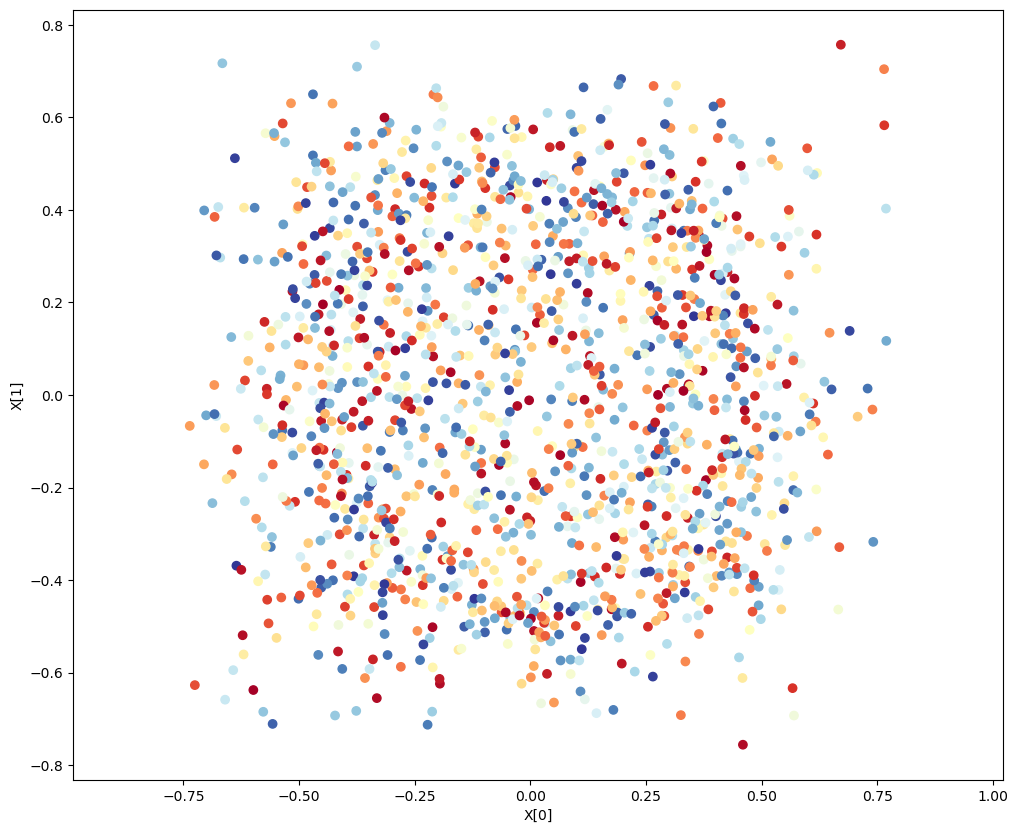

In [46]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (1500, 2)

Sample X : 

             0         1
971   1.210565  1.495428
957   0.949038  1.706666
158  -1.287572 -1.786656
703   0.894499  1.750037
387   1.355888  1.514191
1070  0.246412 -2.043524
1478  0.251263 -1.549503
291  -1.062329 -1.830267
372  -0.469383 -1.971055
1164  0.638105  2.152323


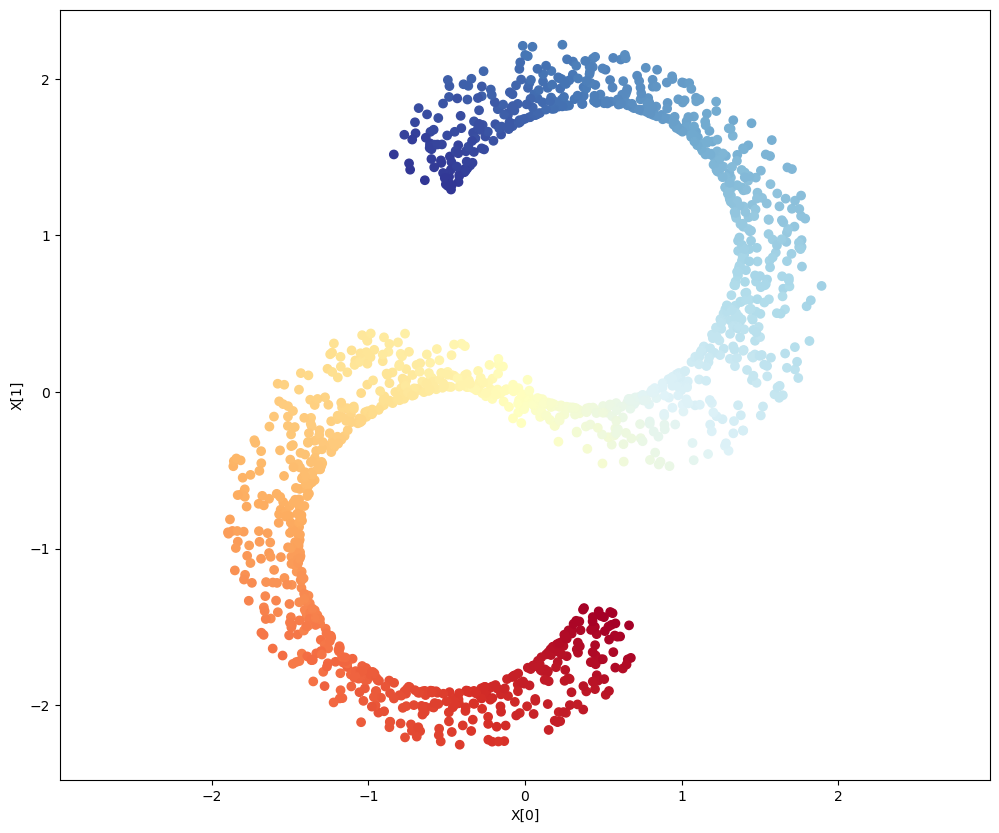

In [47]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

New shape of X :  (1500, 2)

Sample X : 

             0         1
1487 -0.001924  0.000477
741   0.003005 -0.002781
439   0.001630  0.001389
1348 -0.002468 -0.001306
1058 -0.001259  0.002002
77    0.002864 -0.002249
1045  0.001176  0.002156
653   0.001097  0.002315
1312  0.001507  0.001600
1376 -0.001032  0.002306


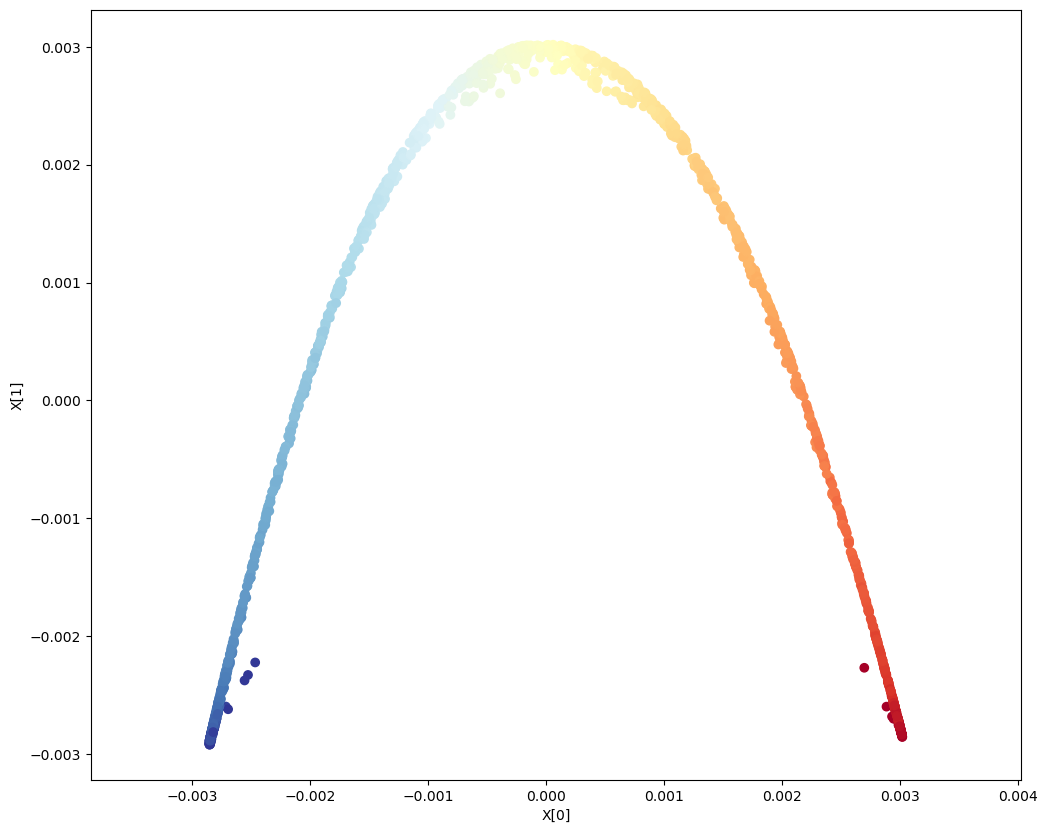

In [48]:
spectral_em = apply_manifold_learning(X, SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

New shape of X :  (1500, 2)

Sample X : 

              0          1
768   -8.477868 -12.647861
838  -16.558271   6.588981
289   -4.869152 -20.782925
200   -1.304862  -1.476318
1057 -25.638832  -6.286860
1210  58.597042  -9.094349
1351 -11.125564 -15.060849
1083 -72.630028   6.037614
256   49.437550  -3.513165
1381  54.034927 -16.092035


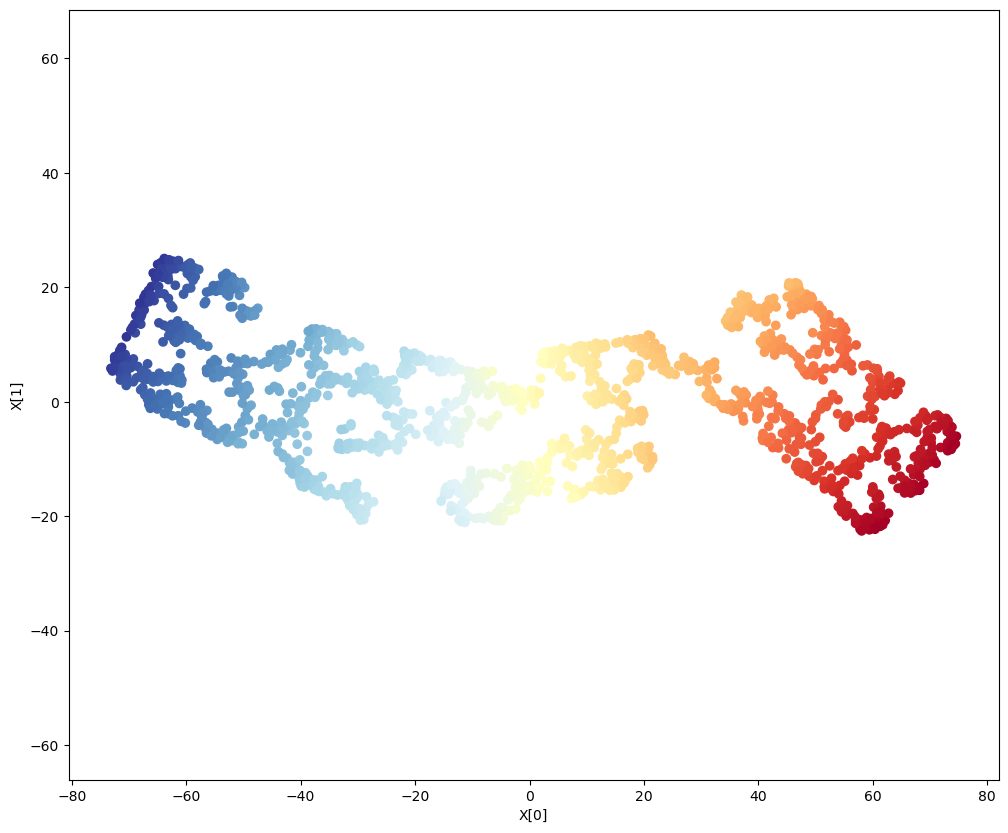

In [49]:
tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))

New shape of X :  (1500, 2)

Sample X : 

             0         1
1488 -1.249978 -0.507328
904   0.030159 -0.183902
72   -3.071700 -0.893537
964  -0.369677  0.918358
962   0.060510 -0.265051
31    0.785844 -0.926898
268  -1.020598 -0.372149
284   0.733999  0.420272
1039 -1.330752 -0.152188
326  -2.755840  0.048892


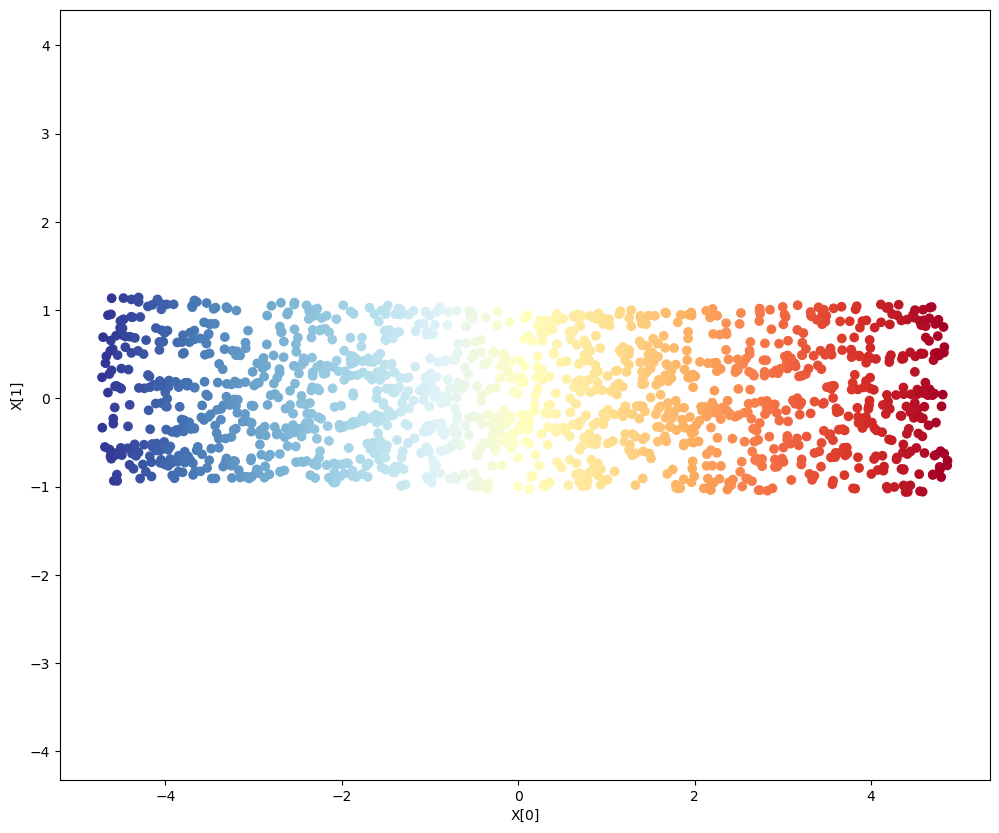

In [50]:
isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components = 2))

New shape of X :  (1500, 2)

Sample X : 

             0         1
1299  0.022451  0.005244
416   0.003139  0.051858
631   0.019009  0.038374
552  -0.017045  0.012625
366   0.028461 -0.014712
362  -0.027417  0.001832
1122  0.041945 -0.050362
392  -0.043958 -0.053181
319  -0.033162 -0.030314
83   -0.000387 -0.001535


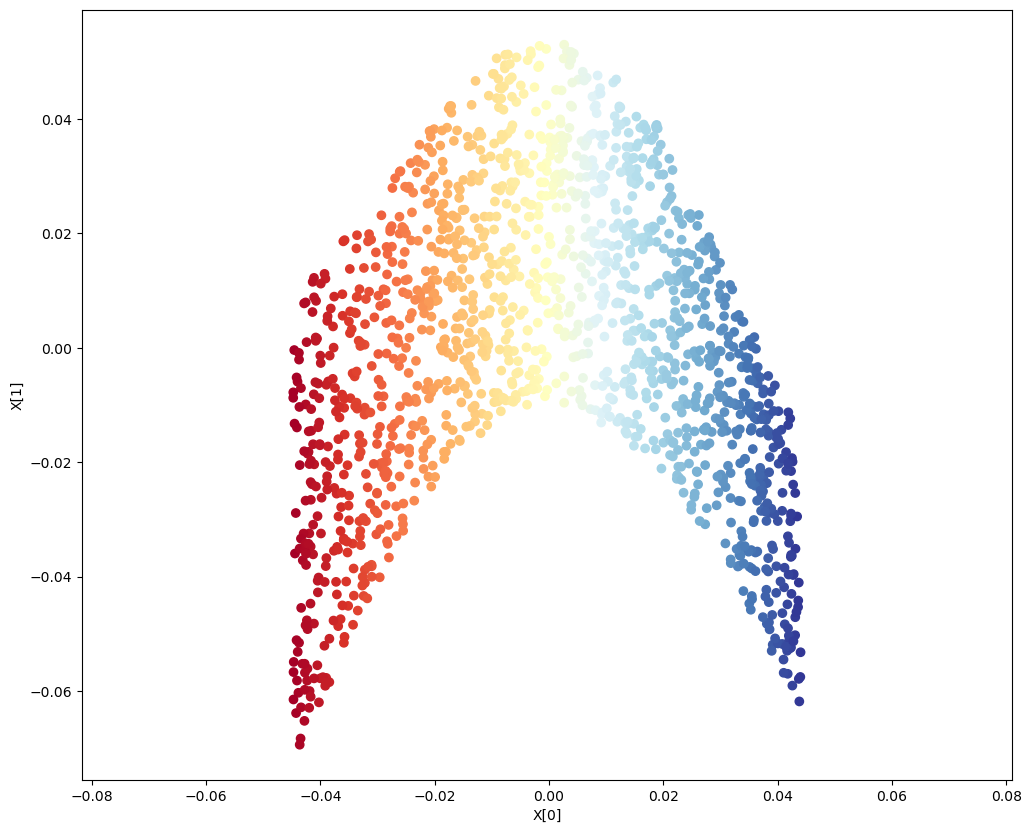

In [51]:
lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard')) 

New shape of X :  (1500, 2)

Sample X : 

             0         1
377   0.003232 -0.025335
637  -0.016534 -0.010774
414  -0.044275  0.031383
606   0.028718  0.035521
1249  0.004173  0.040425
26   -0.035073 -0.023392
374  -0.000768 -0.020255
1458  0.020116 -0.034082
1290 -0.018898 -0.012212
1368  0.030487 -0.002087


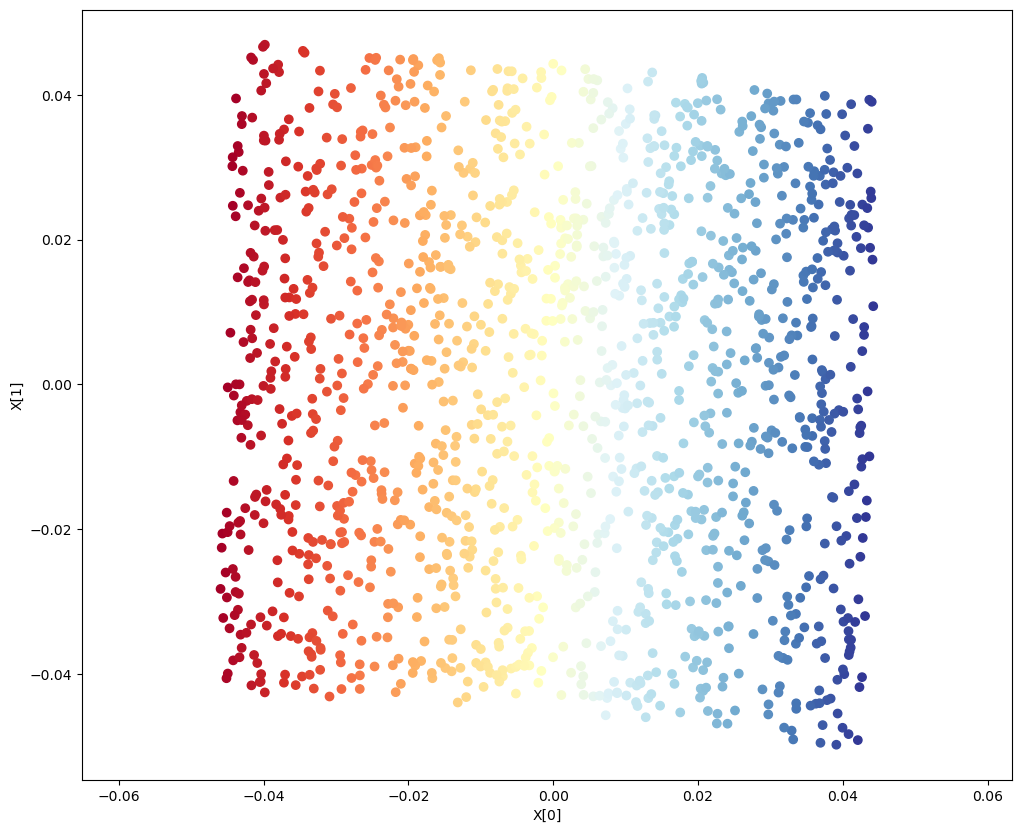

In [52]:
hlle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'))